<a href="https://colab.research.google.com/github/Moussa976/UE3d-Algorith.-DALLARD-Benjamin/blob/main/netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importation des librairies
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 


In [ ]:
#Lien de la data 
#https://www.kaggle.com/shivamb/netflix-shows
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/exos_graphs'
# import du fichier CAC40.csv, on précise ici les colonnes utilisés
data = pd.read_csv(root_path+"/netflix_titles.csv", usecols = ['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description'])
print("dataset loaded")
data.head()

In [7]:
# informations sur le contenu de notre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


## Movie

Dans la partie suivante nous allons nous focaliser sur les **Movie**. 

In [8]:
# on liste les valeurs possibles des types 
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [40]:
# On crée le dataset Movie
movie = data[data['type'] == 'Movie'].copy()

In [41]:
# informations sur le contenu de notre dataset Movie
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4265 entries, 0 to 6231
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4265 non-null   int64 
 1   type          4265 non-null   object
 2   title         4265 non-null   object
 3   director      4137 non-null   object
 4   cast          3905 non-null   object
 5   country       4070 non-null   object
 6   date_added    4264 non-null   object
 7   release_year  4265 non-null   int64 
 8   rating        4257 non-null   object
 9   duration      4265 non-null   object
 10  listed_in     4265 non-null   object
 11  description   4265 non-null   object
dtypes: int64(2), object(10)
memory usage: 433.2+ KB


In [32]:
len(movie.show_id) #Se rassurer qu'il y a 4265 Movie

4265

In [42]:
# Affichage des Movie
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [43]:
# Conversion de la colonne 'date_added' au format date
movie['date_added'] = pd.to_datetime(movie['date_added']) # pas d'autres paramètres nécessaires car l'aspect de la date est bon


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


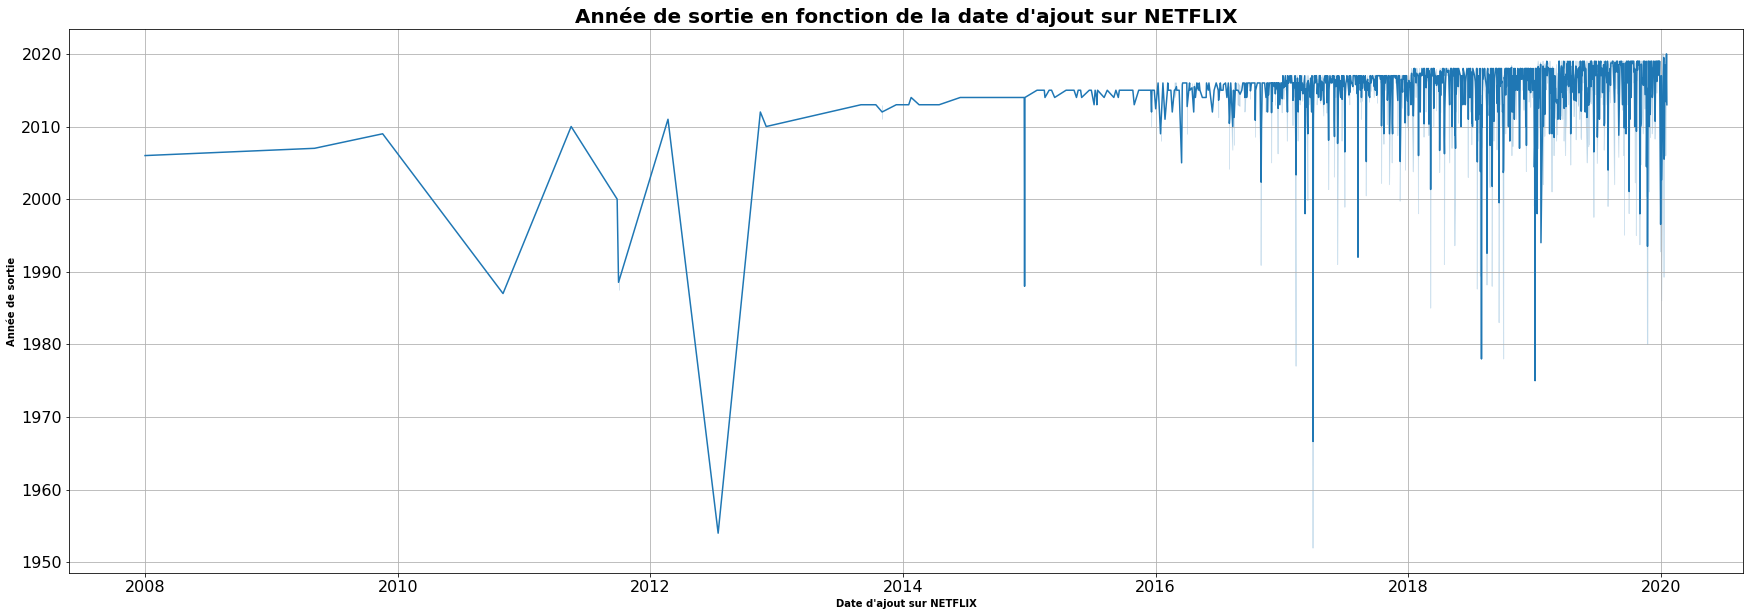

In [44]:
# utilisation de Line plot
fig, ax = plt.subplots(figsize=(30, 10))
# utilisation de grille
plt.grid()
# Affichage du graphe
sns.lineplot(movie['date_added'], movie['release_year'] )

ax.set_title('Année de sortie en fonction de la date d\'ajout sur NETFLIX', fontsize = 20, loc='center',fontdict=dict(weight='bold'))
ax.set_xlabel('Date d\'ajout sur NETFLIX', fontsize = 10, fontdict=dict(weight='bold'))
ax.set_ylabel('Année de sortie', fontsize = 10, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

On constate qu'il y a des films qui sont sorties au XXe siècle et qu'ils sont publié sur Netflix au XXIe.

On aperçoit, une très grosse différence de décallage de dates. 

In [47]:
# Les valeurs vides
movie.isna().sum()

show_id           0
type              0
title             0
director        128
cast            360
country         195
date_added        1
release_year      0
rating            8
duration          0
listed_in         0
description       0
dtype: int64

Nous constatons qu'il manque 128 noms de **director** (Réalisateurs), 360 noms de **cast**, 195 noms de pays et une date d'ajout sur netflix. 

In [49]:
""" Fonction qui permet de calculer le % de données manquantes"""
def donnees_manquantes(dataset, liste_colonnes):
    for colonne in liste_colonnes:
        pourcentage = round((dataset[colonne].isnull().sum()/dataset.shape[0]) * 100, 2)
        print ("Données manquantes pour {}: {}%".format(colonne,pourcentage))
    
donnees_manquantes(movie, ['director', 'cast', 'country','date_added' ])

Données manquantes pour director: 3.0%
Données manquantes pour cast: 8.44%
Données manquantes pour country: 4.57%
Données manquantes pour date_added: 0.02%


In [48]:
movie.describe()

,show_id,release_year
count,4.265000e+03,4265.000000
mean,7.562096e+07,2012.354279
std,1.287630e+07,9.735306
min,2.477470e+05,1942.000000
25%,7.030419e+07,2012.000000
50%,8.015858e+07,2016.000000
75%,8.099157e+07,2017.000000
max,8.123573e+07,2020.000000
